In [1]:
import pandas as pd
import numpy as np

In [4]:
dataset = pd.read_csv("k-nearestdataset.csv")
print(dataset)

    Age  edu_num  captial_gain  hrsperweeks income
0    90        8             0           40  <=50k
1    30        7             0           50  <=50k
2    45        3             0           20  <=50k
3    32       12             0           30   >50k
4    48        5             0           30   >50k
5    99        8             0           45  <=50k
6    80        9             0           34   >50k
7    67       10             0           37  <=50k
8    56        2             0           23   >50k
9    35        6             0           26  <=50k
10   44        9             0           40  <=50k
11   34       18             0           50   >50k
12   77        5             0           60  <=50k
13   88        4             0           75   >50k
14   99        3             0           45  <=50k
15   72       12             0           30  <=50k
16   83       11             0           20   >50k
17   31        8             0           30  <=50k
18   41       15             0 

In [6]:
dataset.shape

(19, 5)

In [7]:
dataset.head(5)

,Age,edu_num,captial_gain,hrsperweeks,income
0,90,8,0,40,<=50k
1,30,7,0,50,<=50k
2,45,3,0,20,<=50k
3,32,12,0,30,>50k
4,48,5,0,30,>50k


In [8]:
x = dataset.iloc[:,: -1]
x

,Age,edu_num,captial_gain,hrsperweeks
0,90,8,0,40
1,30,7,0,50
2,45,3,0,20
3,32,12,0,30
4,48,5,0,30
5,99,8,0,45
6,80,9,0,34
7,67,10,0,37
8,56,2,0,23
9,35,6,0,26


In [10]:
y = dataset.iloc[:,-1]
y

0     <=50k
1     <=50k
2     <=50k
3      >50k
4      >50k
5     <=50k
6      >50k
7     <=50k
8      >50k
9     <=50k
10    <=50k
11     >50k
12    <=50k
13     >50k
14    <=50k
15    <=50k
16     >50k
17    <=50k
18     >50k
Name: income, dtype: object

In [13]:
income_set = set(dataset['income'])
dataset['income'] = dataset['income'].map({'<=50k': 0, '>50k': 1}).astype(int)
print(dataset.head(20))

    Age  edu_num  captial_gain  hrsperweeks  income
0    90        8             0           40       0
1    30        7             0           50       0
2    45        3             0           20       0
3    32       12             0           30       1
4    48        5             0           30       1
5    99        8             0           45       0
6    80        9             0           34       1
7    67       10             0           37       0
8    56        2             0           23       1
9    35        6             0           26       0
10   44        9             0           40       0
11   34       18             0           50       1
12   77        5             0           60       0
13   88        4             0           75       1
14   99        3             0           45       0
15   72       12             0           30       0
16   83       11             0           20       1
17   31        8             0           30       0
18   41     

In [14]:
x = dataset.iloc[:,: -1]
x

,Age,edu_num,captial_gain,hrsperweeks
0,90,8,0,40
1,30,7,0,50
2,45,3,0,20
3,32,12,0,30
4,48,5,0,30
5,99,8,0,45
6,80,9,0,34
7,67,10,0,37
8,56,2,0,23
9,35,6,0,26


In [15]:
y = dataset.iloc[:,-1]
y

0     0
1     0
2     0
3     1
4     1
5     0
6     1
7     0
8     1
9     0
10    0
11    1
12    0
13    1
14    0
15    0
16    1
17    0
18    1
Name: income, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x, y, test_size = 0.25, random_state = 0)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train)

[[ 0.85083959  0.65252644  0.         -1.183119  ]
 [ 0.72366784  0.13050529  0.         -0.24428773]
 [-0.63283087 -0.91353702  0.         -0.51252523]
 [-0.76000262 -1.43555817  0.         -1.183119  ]
 [ 1.52908895 -0.13050529  0.          0.49336541]
 [ 1.06279252 -1.17454759  0.          2.5051467 ]
 [-1.18390847 -0.65252644  0.         -0.78076274]
 [ 0.17259024  0.39151586  0.         -0.0431096 ]
 [-1.35347081 -0.13050529  0.         -0.51252523]
 [-1.22629906  2.47960047  0.          0.82866229]
 [-1.31108023  0.91353702  0.         -0.51252523]
 [ 1.14757368 -0.13050529  0.          0.15806853]
 [ 0.38454316  0.91353702  0.         -0.51252523]
 [ 0.59649608 -0.91353702  0.          1.49925606]]


Text(0, 0.5, 'Mean Error')

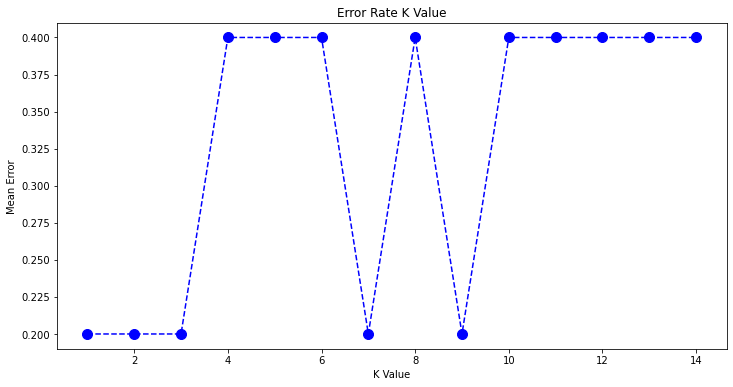

In [39]:
error =[]
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

for i in range(1,15):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    pred_i = model.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1,15), error, color='blue', linestyle='dashed', marker='o' ,markerfacecolor='blue', markersize='10')
plt.title("Error Rate K Value")
plt.xlabel("K Value")
plt.ylabel("Mean Error")

In [42]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski', p = 2)
model.fit(x_train,y_train)

KNeighborsClassifier()

In [43]:
y_pred = model.predict(x_test)

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Accuracy of a model : {0}%".format(accuracy_score(y_test,y_pred)*100))

Accuracy of a model : 60.0%


In [ ]:
age = int(input("Enter New Employee Age: "))
edu = int(input("Enter New Employee Education: "))
cg = int(input("Enter New Captial Gain: "))
hours = int(input("Enter New Hours: "))
newEmp= [[age,edu,cg,hours]]
result = model.predict(sc.transform(newEmp))
print(result)

if result == 1:
    print("Employee Got Salary above 50k")
else:
    print("Employee not got salary above 50k")

In [ ]:
age =int(input("Enter New Employee Age: "))
edu =int(input("Enter New Employee Education: "))
cg =int(input("Enter New Captial Gain: "))
hr =int(input("Enter New Hours: "))
newCmp= [[age,edu,cg,hr]]
result = model.predict(sc.transform(newCmp))
print(result)

if result == 1:
    print("Employee Got Salary above 50k")
else:
    print("Employee not got salary above 50k")